# Bibliotecas

In [82]:
from madeiras import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from UQpy.distributions import Normal
from UQpy.reliability import FORM
from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel

# Execução da otimização

In [83]:
df = pd.read_excel("beam_data.xlsx")
df = df.to_dict(orient="records")
df = df[0] 
df

{'l (cm)': 500,
 'b_wpista (cm)': 900,
 'tipo_secao_longarina': 'Circular',
 'tipo_secao_tabuleiro': 'Retangular',
 'p_gk (kN/m²)': 2,
 'p_rodak (kN)': 40,
 'p_qk (kN/m²)': 4,
 'a (m)': 1.5,
 'classe_carregamento': 'permanente',
 'classe_madeira': 'madeira natural',
 'classe_umidade': 1,
 'gamma_g': 1.4,
 'gamma_q': 1.3,
 'gamma_w': 1.4,
 'psi_2': 0.3,
 'phi': 0.8,
 'densidade longarina (kg/m³)': 350,
 'resistência característica à flexão longarina (MPa)': 50,
 'resistência característica ao cisalhamento longarina (MPa)': 20,
 'módulo de elasticidade à flexão longarina (GPa)': 20,
 'densidade tabuleiro (kg/m³)': 350,
 'resistência característica à flexão tabuleiro (MPa)': 40}

In [84]:
ds = [30, 150]
esps = [30, 200]
bws = [12, 60]
hs = [12, 60]
res_nsga = chamando_nsga2(df, ds, esps, bws, hs)
res_nsga

,d [cm],esp [cm],bw [cm],h [cm],area [m²],delta [m],flex lim beam [kPa],cis lim beam [kPa],delta lim beam [m],flex lim deck [kPa]
0,30.0,200.000000,12.0,60.000000,0.142686,0.009478,-1652.521121,-4872.908687,-0.010522,-13562.242782
1,30.0,74.092418,12.0,12.000000,0.085086,0.002684,-12609.590262,-6938.267562,-0.011488,-467.163775
2,30.0,199.999932,12.0,58.297625,0.140643,0.009359,-1845.472327,-4909.279133,-0.010641,-13350.795266
3,30.0,188.560704,12.0,26.376222,0.102337,0.006747,-6057.844893,-5703.292655,-0.011488,-53.107562
4,30.0,190.187868,12.0,26.487219,0.102470,0.006807,-5961.329423,-5685.099918,-0.011488,-2.824490
...,...,...,...,...,...,...,...,...,...,...
495,30.0,199.999127,12.0,38.110324,0.116418,0.007940,-4133.538111,-5340.569372,-0.011488,-8289.510528
496,30.0,199.999995,12.0,33.748496,0.111184,0.007633,-4627.854855,-5433.745883,-0.011488,-5858.576761
497,30.0,179.221578,12.0,25.487402,0.101271,0.006390,-6633.406467,-5811.783456,-0.011488,-37.878721
498,30.0,200.000000,12.0,42.005530,0.121092,0.008214,-3692.006096,-5257.342548,-0.011488,-9852.111344


In [85]:
res_nsga[res_nsga["area [m²]"] > 0.14]

,d [cm],esp [cm],bw [cm],h [cm],area [m²],delta [m],flex lim beam [kPa],cis lim beam [kPa],delta lim beam [m],flex lim deck [kPa]
0,30.0,200.000000,12.0,60.000000,0.142686,0.009478,-1652.521121,-4872.908687,-0.010522,-13562.242782
2,30.0,199.999932,12.0,58.297625,0.140643,0.009359,-1845.472327,-4909.279133,-0.010641,-13350.795266
5,30.0,199.997193,12.0,57.942023,0.140216,0.009334,-1885.967340,-4916.912263,-0.010666,-13304.328260
22,30.0,199.999991,12.0,58.537967,0.140931,0.009376,-1818.227836,-4904.143667,-0.010624,-13381.767302
41,30.0,199.999958,12.0,59.300081,0.141846,0.009429,-1731.852592,-4887.862317,-0.010571,-13477.508013
95,30.0,200.000000,12.0,59.004590,0.141491,0.009408,-1765.340468,-4894.174633,-0.010592,-13440.825818
102,30.0,199.999666,12.0,59.230706,0.141763,0.009424,-1739.736127,-4889.348329,-0.010576,-13468.952321
116,30.0,199.999142,12.0,59.588885,0.142192,0.009449,-1699.177494,-4881.703206,-0.010551,-13512.852831
162,30.0,199.999958,12.0,58.929562,0.141401,0.009403,-1773.847060,-4895.778088,-0.010597,-13431.425260
204,30.0,200.000000,12.0,58.736681,0.141170,0.009389,-1795.705142,-4899.898239,-0.010611,-13407.089442


# Fronteira eficiente

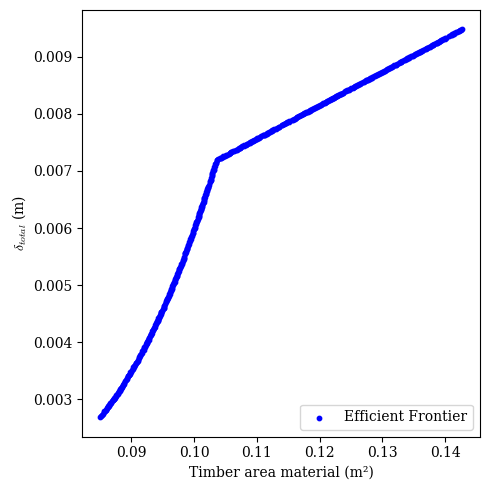

In [86]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [m]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='lower right',)
plt.tight_layout()
plt.show()

# Teste da função objetivo

In [87]:
# 1) Instancia o problema
df = pd.read_excel("beam_data.xlsx")
df = df.to_dict(orient="records")
df = df[0] 
df
problem = ProjetoOtimo(
                        l=df["l (cm)"],
                        p_gk=df["p_gk (kN/m²)"],
                        p_rodak=df["p_rodak (kN)"],
                        p_qk=df["p_qk (kN/m²)"],
                        a=df["a (m)"],
                        classe_carregamento=df["classe_carregamento"],
                        classe_madeira=df["classe_madeira"],
                        classe_umidade=df["classe_umidade"],
                        gamma_g=df["gamma_g"],
                        gamma_q=df["gamma_q"],
                        gamma_w=df["gamma_w"],
                        psi2=df["psi_2"],
                        phi=df["phi"],
                        densidade_long=df["densidade longarina (kg/m³)"],
                        densidade_tab=df["densidade tabuleiro (kg/m³)"],
                        f_mk_long=df["resistência característica à flexão longarina (MPa)"],
                        f_vk_long=df["resistência característica ao cisalhamento longarina (MPa)"],
                        e_modflex_long=df["módulo de elasticidade à flexão longarina (GPa)"],
                        f_mk_tab=df["resistência característica à flexão tabuleiro (MPa)"],
                        d_min=ds[0],
                        d_max=ds[1],
                        esp_min=esps[0],
                        esp_max=esps[1],
                        bw_min=bws[0],
                        bw_max=bws[1],
                        h_min=hs[0],
                        h_max=hs[1],
                    )

# 2) Define uma solução manual
x_manual = np.array([[34., 120.0, 10., 30.]])   # d, esp, bw, h

# 3) Avalia
out = problem.evaluate(x_manual, return_values_of=["F", "G"])

# 4) Imprime resultados
f = out[0]
g = out[1]
print(f, g)

[[ 0.12079203 -0.00289453]] [[-1.30537448e+04 -6.81667559e+03 -1.25897588e-02 -8.88570230e+03]]


# Monte Carlo

Total amostras: 25000
Viáveis: 24261


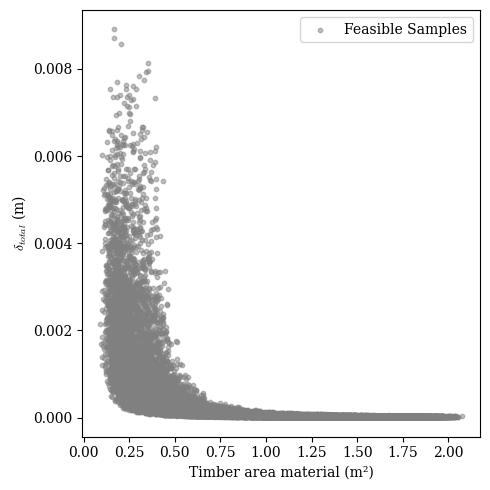

In [88]:
# ---------------------------
# Monte Carlo + filtro viável
# ---------------------------
N = 25000
rng = np.random.default_rng(123)

# amostra uniformemente no intervalo do problema
d_mc = rng.uniform(problem.xl[0], problem.xu[0], size=N)
X_mc = d_mc.reshape(-1, 1)   # shape (N,1)
esp_mc = rng.uniform(problem.xl[1], problem.xu[1], size=N)
bw_mc = rng.uniform(problem.xl[2], problem.xu[2], size=N)
h_mc = rng.uniform(problem.xl[3], problem.xu[3], size=N)
X_mc = np.column_stack((d_mc, esp_mc, bw_mc,  h_mc))  # shape (N,4)

# avalia em lote
out = problem.evaluate(X_mc, return_values_of=["F", "G"])
F = np.asarray(out[0])   # shape (N,2)
G = np.asarray(out[1])   # shape (N,4)

# filtro de viabilidade: todas restrições <= 0
mask_feas = np.all(G <= 0.0, axis=1)

F_feas = F[mask_feas]
G_feas = G[mask_feas]
X_feas = X_mc[mask_feas]

print("Total amostras:", N)
print("Viáveis:", int(mask_feas.sum()))

# ---------------------------
# Scatter plot (f1 vs f2)
# ---------------------------
# Se seu f2 = -delta, converta para delta positivo no plot:
F_plot = F_feas.copy()
F_plot[:, 1] = -F_plot[:, 1]

plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

# Unindo as duas soluções

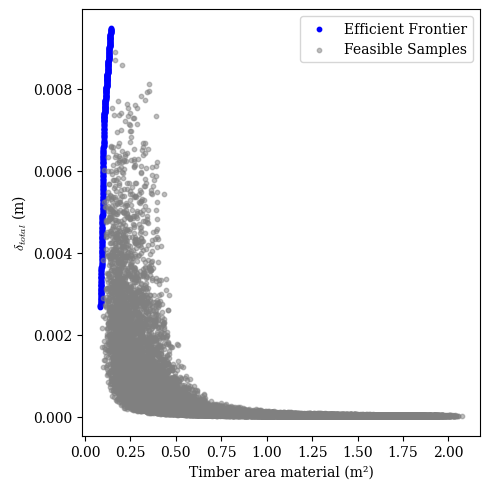

In [90]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [m]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

# Confiabilidade

In [91]:
df = pd.read_excel("beam_data.xlsx")
df = df.loc[0]
p_gk = float(df["p_gk (kN/m²)"])
p_rodak = float(df["p_rodak (kN)"])
p_qk = float(df["p_qk (kN/m²)"])
a = float(df["a (m)"])
l = float(df["l (cm)"])
classe_carregamento = df["classe_carregamento"]
classe_madeira = df["classe_madeira"]
classe_umidade = df["classe_umidade"]
f_mk = float(df["resistência característica à flexão longarina (MPa)"])
f_vk = float(df["resistência característica ao cisalhamento longarina (MPa)"])
e_modflex = float(df["módulo de elasticidade à flexão longarina (GPa)"])
f_mktab = float(df["resistência característica à flexão tabuleiro (MPa)"])
densidade_long = float(df["densidade longarina (kg/m³)"])
densidade_tab = float(df["densidade tabuleiro (kg/m³)"])
d = 35.
esp = 120.0
bw = 11.0
h = 30.0

In [92]:
samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
params = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flexao"]
obj_confia(samples, params)

array([24306.82282001])

In [93]:
beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao")
beta, pf

(7.815375499446551, 2.739970930364477e-15)

In [94]:
sm, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao", method="IS")
beta, pf

(9.262340089798409, 0.0)

In [95]:
pf

0.0

In [96]:
df = pd.DataFrame(sm.samples)
df


,0,1,2,3,4,5,6,7,8
0,2.523425,40.332522,3.680689,42.742388,14.344494,17.508690,32.460459,363.624352,321.373159
1,2.264472,42.159989,4.063433,36.991407,17.632885,17.861491,33.477062,412.155191,422.160034
2,2.220179,35.742486,7.442721,43.996842,18.976632,18.566490,27.620866,356.175141,411.276496
3,2.430956,50.918949,5.299062,46.958649,15.474678,16.021081,29.639504,389.668990,374.435713
4,2.539504,40.881068,4.524493,41.806236,17.973795,16.693741,37.473919,351.483560,378.063540
...,...,...,...,...,...,...,...,...,...
99995,2.326974,51.780019,4.148923,44.492855,18.499693,20.023416,32.657034,355.512243,335.119220
99996,2.413023,36.253195,5.017667,38.808164,14.830742,18.018763,29.027935,421.823851,368.467238
99997,2.667797,37.863507,4.515832,41.635987,17.450502,17.170057,32.161794,392.374890,419.369290
99998,2.440025,45.286923,4.494241,41.610034,20.032779,16.836773,33.125313,407.314027,336.596218


In [97]:
model = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=params)
rmodel = RunModel(model=model)
rmodel.run(samples=sm.samples)
rmodel.qoi_list

[array([19765.02682067]),
 array([15981.78116722]),
 array([18019.58345047]),
 array([21123.97386498]),
 array([18481.13922478]),
 array([19748.74451863]),
 array([21316.19751164]),
 array([24817.39696479]),
 array([20166.76513713]),
 array([15828.36589823]),
 array([18360.94567959]),
 array([17789.39940491]),
 array([19028.66193809]),
 array([18562.7830954]),
 array([19831.85804872]),
 array([19376.42387559]),
 array([18382.40358126]),
 array([22796.38965348]),
 array([21290.69017133]),
 array([15480.19345689]),
 array([19896.0650165]),
 array([20329.48856719]),
 array([12865.11039096]),
 array([18831.98214018]),
 array([25268.69988382]),
 array([18288.83358785]),
 array([19652.55755212]),
 array([22558.0518505]),
 array([17912.12757317]),
 array([22373.31828936]),
 array([21944.44883474]),
 array([15501.88631292]),
 array([18246.8025337]),
 array([21920.37243669]),
 array([17342.43250194]),
 array([21235.67337768]),
 array([21184.95823649]),
 array([21682.5127057]),
 array([18385.879

In [98]:
samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
paramss = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flecha"]
obj_confia(samples, paramss)

array([0.02845766])

In [99]:
beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha")
beta, pf

ZeroDivisionError: float division by zero

In [ ]:
sf, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha", method="IS")
beta, pf

(9.262340089798409, 0.0)

In [ ]:
sf.samples

array([[  2.52342535,  40.33252213,   3.68068896, ...,  32.46045932,
        363.62435163, 321.37315897],
       [  2.26447229,  42.15998854,   4.06343262, ...,  33.47706178,
        412.15519087, 422.16003432],
       [  2.22017855,  35.74248629,   7.44272145, ...,  27.62086575,
        356.17514082, 411.27649584],
       ...,
       [  2.66779704,  37.86350724,   4.51583239, ...,  32.16179419,
        392.37488993, 419.36929034],
       [  2.44002475,  45.28692299,   4.49424053, ...,  33.12531311,
        407.31402703, 336.59621776],
       [  2.46884879,  40.33102358,   4.2953076 , ...,  36.80060692,
        347.39322028, 387.22616197]])

In [ ]:
modelf = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=paramss)
rmodelf = RunModel(model=modelf)
rmodelf.run(samples=sf.samples)
rmodelf.qoi_list

[array([0.02839609]),
 array([0.0281402]),
 array([0.02583984]),
 array([0.02628904]),
 array([0.02722235]),
 array([0.02728186]),
 array([0.02839284]),
 array([0.02762287]),
 array([0.02910103]),
 array([0.02846391]),
 array([0.02843869]),
 array([0.02681531]),
 array([0.0290088]),
 array([0.02728188]),
 array([0.02808193]),
 array([0.0285302]),
 array([0.02773661]),
 array([0.02736313]),
 array([0.02898355]),
 array([0.02839042]),
 array([0.02472564]),
 array([0.02594098]),
 array([0.02785667]),
 array([0.02879716]),
 array([0.02734339]),
 array([0.02893233]),
 array([0.02838487]),
 array([0.02851866]),
 array([0.02802299]),
 array([0.02811531]),
 array([0.02886485]),
 array([0.02789539]),
 array([0.02652382]),
 array([0.02597454]),
 array([0.02741641]),
 array([0.02513166]),
 array([0.02752602]),
 array([0.02816286]),
 array([0.02836834]),
 array([0.02792772]),
 array([0.02882565]),
 array([0.02761217]),
 array([0.02822412]),
 array([0.02809841]),
 array([0.02896006]),
 array([0.026

In [ ]:
import numpy as np

valores = np.array(rmodelf.qoi_list).flatten()
quantidade_negativos = np.count_nonzero(valores < 0.0)
quantidade_negativos

0